Copyright **`(c)`** 2024 Giovanni Squillero `<giovanni.squillero@polito.it>`  
[`https://github.com/squillero/computational-intelligence`](https://github.com/squillero/computational-intelligence)  
Free for personal or classroom use; see [`LICENSE.md`](https://github.com/squillero/computational-intelligence/blob/master/LICENSE.md) for details.  

# Set Cover problem

See: https://en.wikipedia.org/wiki/Set_cover_problem

In [50]:
from random import random, seed
from itertools import product, accumulate
import numpy as np
import matplotlib.pyplot as plt
from collections import deque

## Reproducible Initialization

If you want to get reproducible results, use `rng` (and restart the kernel); for non-reproducible ones, use `np.random`.

In [54]:
UNIVERSE_SIZE = 10_000
NUM_SETS = 1_000
DENSITY = 0.2

rng = np.random.Generator(np.random.PCG64([UNIVERSE_SIZE, NUM_SETS, int(10_000 * DENSITY)]))

In [10]:
# DON'T EDIT THESE LINES!
# I betrayed the professor because I changed np.pow to np.power... (couldn't compile otherwise)

SETS = np.random.random((NUM_SETS, UNIVERSE_SIZE)) < DENSITY
for s in range(UNIVERSE_SIZE):
    if not np.any(SETS[:, s]):
        SETS[np.random.randint(NUM_SETS), s] = True
COSTS = np.power(SETS.sum(axis=1), 1.1)

## Helper Functions

In [44]:
def valid(solution):
    """Checks wether solution is valid (ie. covers all universe)"""
    return np.all(np.logical_or.reduce(SETS[solution]))


def cost(solution):
    """Returns the cost of a solution (to be minimized)"""
    return COSTS[solution].sum()

## Have Fun!

In [43]:
# A dumb solution of "all" sets
solution = np.full(NUM_SETS, True)
valid(solution), cost(solution)

(True, 304.7357046283452)

In [42]:
# A random solution with random 50% of the sets
solution = rng.random(NUM_SETS) < .5
valid(solution), cost(solution)

(False, 226.72442249376877)

## Tabu Search

In [17]:
def tweak(solution: np.ndarray) -> np.ndarray:
    new_solution = solution.copy()
    index = np.random.randint(NUM_SETS)
    new_solution[index] = not new_solution[index]
    return new_solution

def fitness(solution: np.ndarray) -> tuple:
    return (valid(solution), -cost(solution))

In [52]:
def tabu_search(max_iter=1000, tweaks_per_step=10, tabu_size=100):
    solution = rng.random(NUM_SETS) < .5
    current_validity, current_fitness = fitness(solution)
    best_solution = solution.copy()
    best_fitness = current_fitness
    
    history = []
    tabu_list = deque(maxlen=tabu_size)  #Deque that will act as out tabu list
    tabu_list.append(solution.tobytes())  
    
    for iteration in range(max_iter):
        best_tweak = None
        best_tweak_fitness = float('-inf')
        
        for _ in range(tweaks_per_step):
            candidate_tweak = tweak(solution)
            candidate_validity, candidate_fitness = fitness(candidate_tweak)
            
            if candidate_validity and candidate_tweak.tobytes() not in tabu_list:
                if candidate_fitness > best_tweak_fitness:
                    best_tweak = candidate_tweak
                    best_tweak_fitness = candidate_fitness
        
        if best_tweak is not None:
            solution = best_tweak
            current_validity, current_fitness = fitness(solution)
            tabu_list.append(solution.tobytes())  #We add the new solution to the tabu list
            
            if current_fitness > best_fitness:
                best_solution = solution.copy()
                best_fitness = current_fitness
            
            print(f"Iteration {iteration}: fitness = {current_fitness}, valid = {current_validity}")
        else:
            print(f"Iteration {iteration}: no valid tweak found, fitness = {current_fitness}")
        
        history.append(current_fitness)
    
    # Plotting
    plt.figure(figsize=(14, 8))
    plt.plot(
        range(len(history)),
        list(accumulate(history, max)), 
        color="red"
    )
    _ = plt.scatter(range(len(history)), history, marker=".")
    plt.title("Fitness during Tabu Search")
    plt.xlabel("Iteration")
    plt.ylabel("Fitness")
    plt.grid()
    plt.show()

    return best_solution, best_fitness

# Istance 1 

Iteration 0: no valid tweak found, fitness = -163.588481383561
Iteration 1: no valid tweak found, fitness = -163.588481383561
Iteration 2: no valid tweak found, fitness = -163.588481383561
Iteration 3: no valid tweak found, fitness = -163.588481383561
Iteration 4: no valid tweak found, fitness = -163.588481383561
Iteration 5: no valid tweak found, fitness = -163.588481383561
...
Iteration 4995: no valid tweak found, fitness = -163.588481383561
Iteration 4996: no valid tweak found, fitness = -163.588481383561
Iteration 4997: no valid tweak found, fitness = -163.588481383561
Iteration 4998: no valid tweak found, fitness = -163.588481383561
Iteration 4999: no valid tweak found, fitness = -163.588481383561


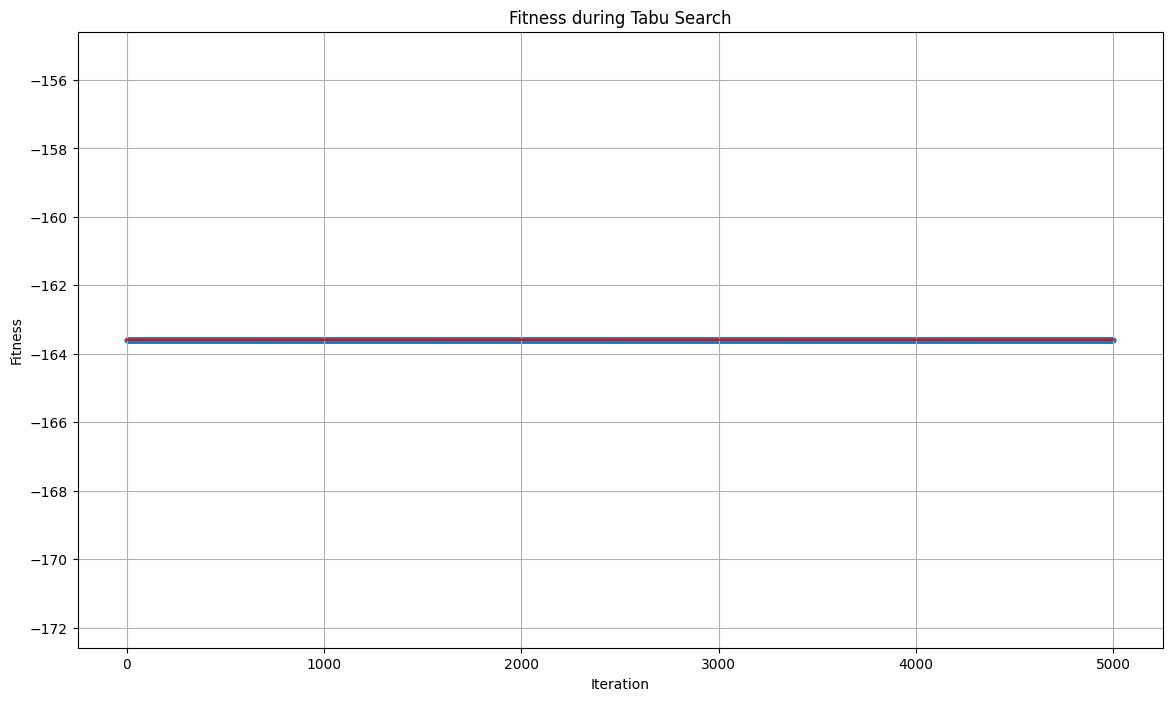

Best final fitness: -163.588481383561


In [56]:
UNIVERSE_SIZE = 100
NUM_SETS = 10
DENSITY = 0.2

rng = np.random.Generator(np.random.PCG64([UNIVERSE_SIZE, NUM_SETS, int(10_000 * DENSITY)]))

SETS = np.random.random((NUM_SETS, UNIVERSE_SIZE)) < DENSITY
for s in range(UNIVERSE_SIZE):
    if not np.any(SETS[:, s]):
        SETS[np.random.randint(NUM_SETS), s] = True
COSTS = np.power(SETS.sum(axis=1), 1.1)


best_solution, best_fitness = tabu_search(max_iter=5000, tweaks_per_step=20, tabu_size=100)
print("Best final fitness:", best_fitness)

In the first istance my algorithm does not find any improvment. 

# Istance 2

Iteration 0: fitness = -15501.154899958168, valid = True
Iteration 1: fitness = -15131.412610325671, valid = True
Iteration 2: fitness = -14756.017573589248, valid = True
Iteration 3: fitness = -14388.157794328072, valid = True
Iteration 4: fitness = -14016.532122586941, valid = True
Iteration 5: fitness = -13652.434734230836, valid = True
...
Iteration 4995: fitness = -7205.537999229944, valid = True
Iteration 4996: fitness = -7509.939249830958, valid = True
Iteration 4997: fitness = -7201.836057121098, valid = True
Iteration 4998: fitness = -7480.440551619677, valid = True
Iteration 4999: fitness = -7781.143948475468, valid = True


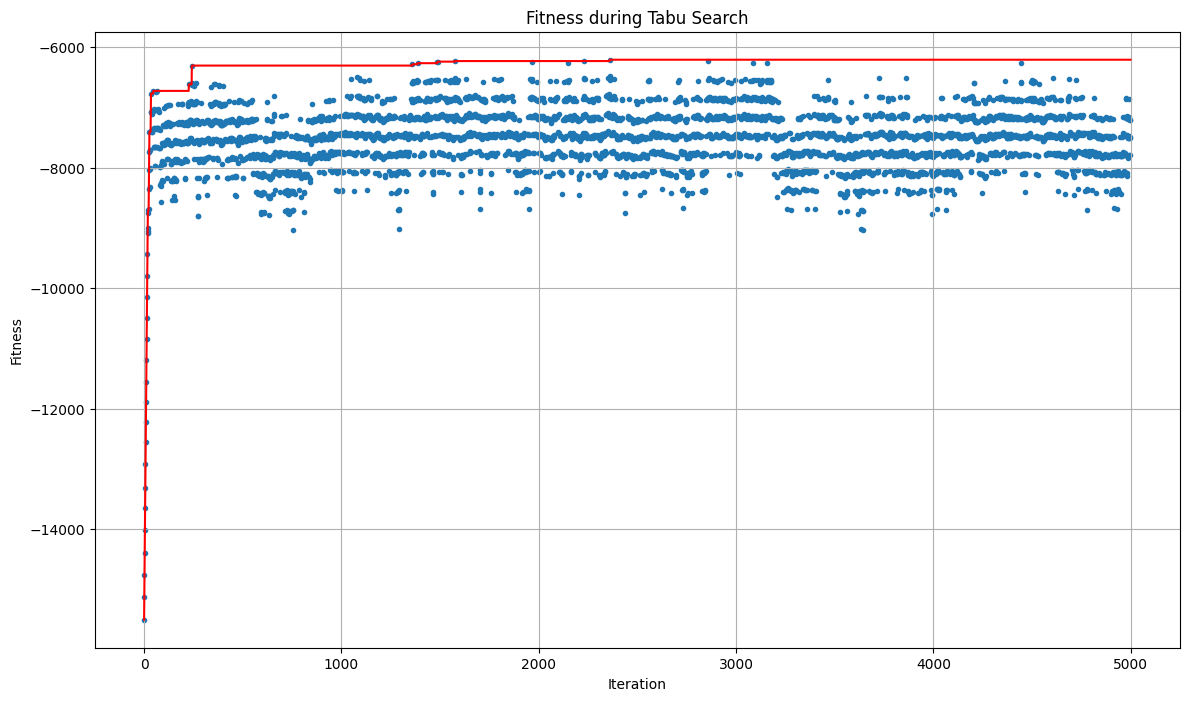

Best final fitness: -6205.224568159618


In [57]:
UNIVERSE_SIZE = 1_000
NUM_SETS = 100
DENSITY = 0.2

rng = np.random.Generator(np.random.PCG64([UNIVERSE_SIZE, NUM_SETS, int(10_000 * DENSITY)]))

SETS = np.random.random((NUM_SETS, UNIVERSE_SIZE)) < DENSITY
for s in range(UNIVERSE_SIZE):
    if not np.any(SETS[:, s]):
        SETS[np.random.randint(NUM_SETS), s] = True
COSTS = np.power(SETS.sum(axis=1), 1.1)


best_solution, best_fitness = tabu_search(max_iter=5000, tweaks_per_step=20, tabu_size=100)
print("Best final fitness:", best_fitness)

# Istance 3

Iteration 0: fitness = -2133445.659136526, valid = True
Iteration 1: fitness = -2129022.6531514674, valid = True
Iteration 2: fitness = -2124561.8804171365, valid = True
Iteration 3: fitness = -2120162.4637876013, valid = True
Iteration 4: fitness = -2115824.3255684655, valid = True
Iteration 5: fitness = -2111408.397593838, valid = True
...
Iteration 4995: fitness = -189104.525134141, valid = True
Iteration 4996: fitness = -185010.70533879413, valid = True
Iteration 4997: fitness = -180858.27317172784, valid = True
Iteration 4998: fitness = -176792.5603067519, valid = True
Iteration 4999: fitness = -180905.12781405594, valid = True


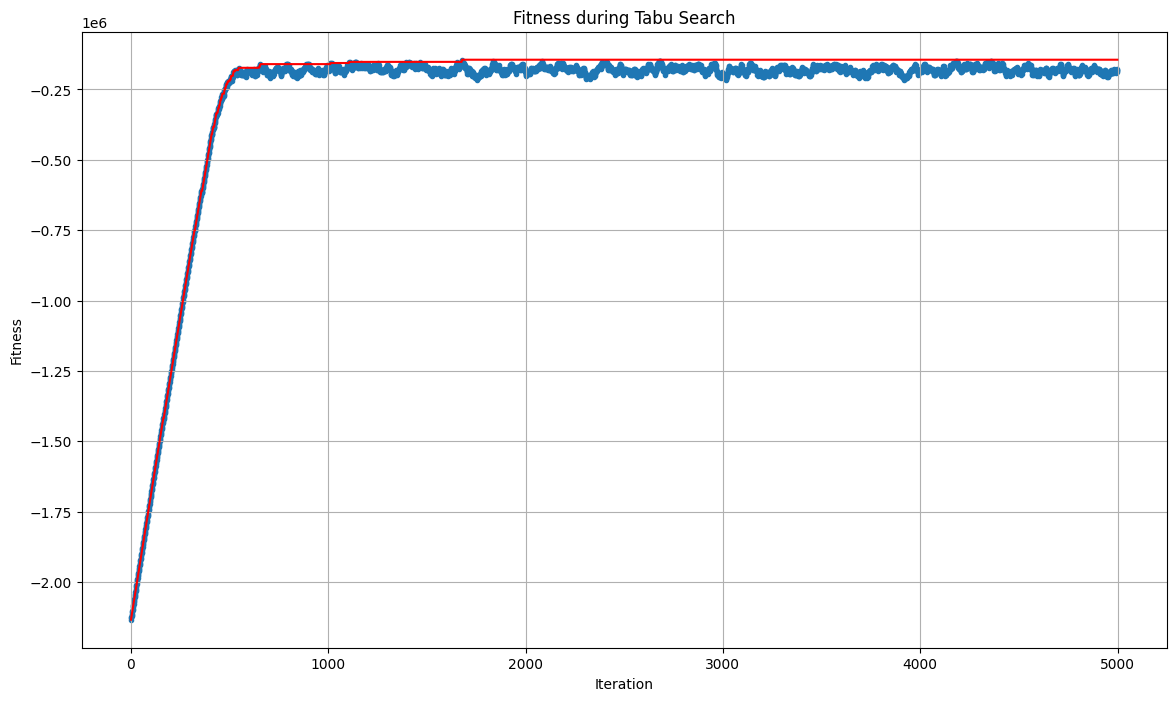

Best final fitness: -144477.70318167217


In [58]:
UNIVERSE_SIZE = 10_000
NUM_SETS = 1_000
DENSITY = 0.2

rng = np.random.Generator(np.random.PCG64([UNIVERSE_SIZE, NUM_SETS, int(10_000 * DENSITY)]))

SETS = np.random.random((NUM_SETS, UNIVERSE_SIZE)) < DENSITY
for s in range(UNIVERSE_SIZE):
    if not np.any(SETS[:, s]):
        SETS[np.random.randint(NUM_SETS), s] = True
COSTS = np.power(SETS.sum(axis=1), 1.1)


best_solution, best_fitness = tabu_search(max_iter=5000, tweaks_per_step=20, tabu_size=100)
print("Best final fitness:", best_fitness)

# Istance 4

For the following istances, I've removed the output box, so I will insert the plot separately. 

In [ ]:
UNIVERSE_SIZE = 100_000
NUM_SETS = 10_000
DENSITY = 0.1

rng = np.random.Generator(np.random.PCG64([UNIVERSE_SIZE, NUM_SETS, int(10_000 * DENSITY)]))

SETS = np.random.random((NUM_SETS, UNIVERSE_SIZE)) < DENSITY
for s in range(UNIVERSE_SIZE):
    if not np.any(SETS[:, s]):
        SETS[np.random.randint(NUM_SETS), s] = True
COSTS = np.power(SETS.sum(axis=1), 1.1)


best_solution, best_fitness = tabu_search(max_iter=500, tweaks_per_step=20, tabu_size=100)
print("Best final fitness:", best_fitness)

![output4](images/output4.png)

# Istance 5

In [ ]:
UNIVERSE_SIZE = 100_000
NUM_SETS = 10_000
DENSITY = 0.2

rng = np.random.Generator(np.random.PCG64([UNIVERSE_SIZE, NUM_SETS, int(10_000 * DENSITY)]))

SETS = np.random.random((NUM_SETS, UNIVERSE_SIZE)) < DENSITY
for s in range(UNIVERSE_SIZE):
    if not np.any(SETS[:, s]):
        SETS[np.random.randint(NUM_SETS), s] = True
COSTS = np.power(SETS.sum(axis=1), 1.1)


best_solution, best_fitness = tabu_search(max_iter=5000, tweaks_per_step=20, tabu_size=100)
print("Best final fitness:", best_fitness)

![output5](images/output5.png)

# Istance 6

In [ ]:
UNIVERSE_SIZE = 100_000
NUM_SETS = 10_000
DENSITY = 0.3

rng = np.random.Generator(np.random.PCG64([UNIVERSE_SIZE, NUM_SETS, int(10_000 * DENSITY)]))

SETS = np.random.random((NUM_SETS, UNIVERSE_SIZE)) < DENSITY
for s in range(UNIVERSE_SIZE):
    if not np.any(SETS[:, s]):
        SETS[np.random.randint(NUM_SETS), s] = True
COSTS = np.power(SETS.sum(axis=1), 1.1)


best_solution, best_fitness = tabu_search(max_iter=5000, tweaks_per_step=20, tabu_size=100)
print("Best final fitness:", best_fitness)

![output6](images/output6.png)

These istances reach a plateu at around 5000 iterations, it could be interesting to see them better but considering it took more than two hours to run each one of them...